In [56]:
# %pip install -q torch-scatter -f https://data.pyg.org/whl/torch-1.10.0+cu113.html
# %pip install -q torch-sparse -f https://data.pyg.org/whl/torch-1.10.0+cu113.html
# %pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

In [1]:
import networkx as nx
import numpy as np
import pandas as pd

In [2]:
u_data_columns = ['user id', 'item id', 'rating', 'timestamp']
u_data = pd.read_csv("ml-100k/u.data", sep="\t", names=u_data_columns)
u_data.head()

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
ratings = u_data[u_data['rating']>=3]
print(len(ratings))

82520


In [4]:
rating_values = u_data.groupby(['rating'])['rating'].count().values

In [5]:
# %pip install seaborn

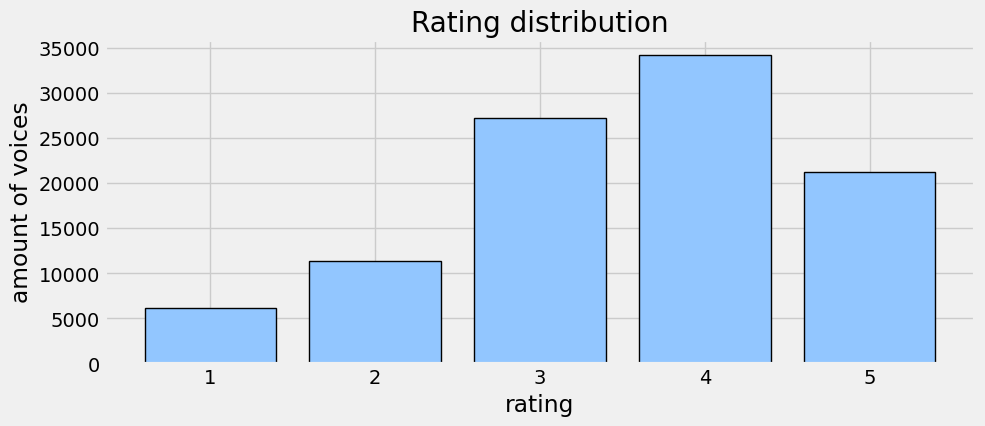

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-pastel')
# color = plt.cm.cool(np.linspace(0, 1, 5))
plt.bar(x=np.arange(1, 6), height=rating_values, edgecolor="k", linewidth=1)
plt.xlabel("rating")
plt.ylabel("amount of voices")
plt.title("Rating distribution")
plt.show()

In [7]:
item_dist = u_data.groupby(['item id'])['rating'].count()
# item_dist sorted()

In [28]:
u_genre = pd.read_csv("ml-100k/u.genre", sep="|", names=['genre', 'id'], encoding='latin-1')
u_genre.head()

,genre,id
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4


In [31]:
ganres = list(u_genre['genre'])

In [30]:
u_item_columns = ['movie id', 'movie title', 'release data', 'video release data', 'URL'] + ganres
u_item = pd.read_csv("ml-100k/u.item", sep="|", names=u_item_columns, encoding='latin-1')
u_item.head(3)

,movie id,movie title,release data,video release data,URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


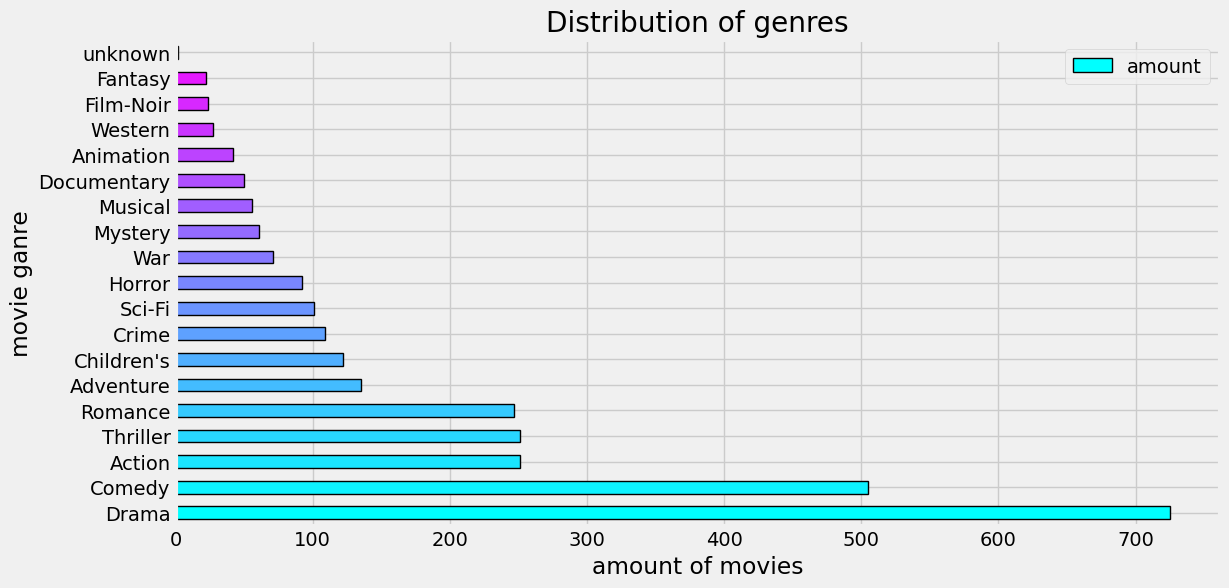

In [57]:
words_freq = [(ganre, u_item[ganre].sum()) for ganre in ganres]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['genre', 'amount'])

plt.style.use('seaborn-v0_8-pastel')
color = plt.cm.cool(np.linspace(0, 1, 20))
frequency.head(20).plot(x='genre', y='amount', kind='barh', figsize=(12, 6), color = color, edgecolor="k", linewidth=1)
plt.xlabel('amount of movies')
plt.ylabel('movie ganre')
plt.title("Distribution of genres")
plt.show()

In [9]:
u_user_columns = ['user_id', 'age', 'gender', 'occupation', 'zip code']
u_user = pd.read_csv("ml-100k/u.user", sep="|", names=u_user_columns, encoding='latin-1')
u_user.head(3)

,user_id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067


C:\Users\84907\AppData\Local\Temp\ipykernel_34556\2809203518.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(u_user['age'], bins=20, hist_kws=dict(edgecolor="k", linewidth=1))


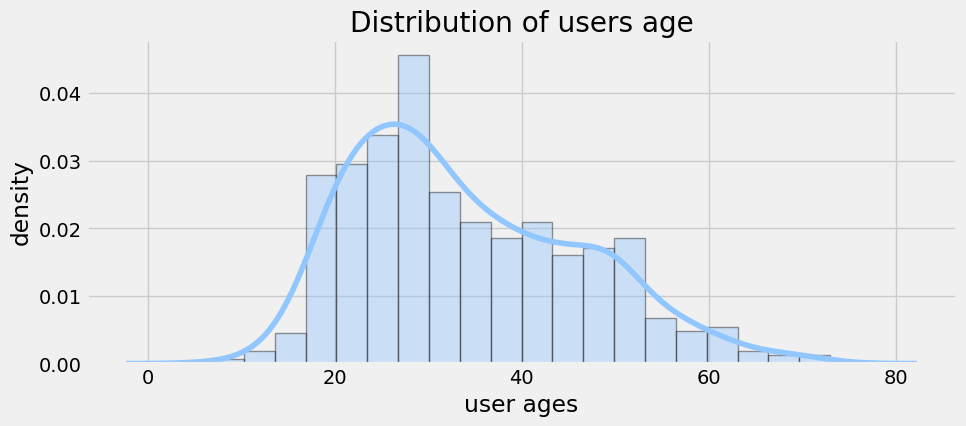

In [55]:
plt.clf()

plt.rcParams['figure.figsize'] = (10, 4)

# plt.subplot(1, 2, 1)
sns.distplot(u_user['age'], bins=20, hist_kws=dict(edgecolor="k", linewidth=1))
# sns.histplot(u_user['age'], kde=True)

# plt.subplot(1, 2, 2)
# sns.distplot(u_user['trn_tox'])

plt.title('Distribution of users age')
plt.ylabel('density')
plt.xlabel("user ages")
plt.show()

In [68]:
u1_train = pd.read_csv("ml-100k/u1.base", sep="\t", names=u_data_columns)
u2_train = pd.read_csv("ml-100k/u2.base", sep="\t", names=u_data_columns)
u3_train = pd.read_csv("ml-100k/u3.base", sep="\t", names=u_data_columns)
u4_train = pd.read_csv("ml-100k/u4.base", sep="\t", names=u_data_columns)
u5_train = pd.read_csv("ml-100k/u5.base", sep="\t", names=u_data_columns)

In [69]:
u1_test = pd.read_csv("ml-100k/u1.test", sep="\t", names=u_data_columns)
u2_test = pd.read_csv("ml-100k/u2.test", sep="\t", names=u_data_columns)
u3_test = pd.read_csv("ml-100k/u3.test", sep="\t", names=u_data_columns)
u4_test = pd.read_csv("ml-100k/u4.test", sep="\t", names=u_data_columns)
u5_test = pd.read_csv("ml-100k/u5.test", sep="\t", names=u_data_columns)
u5_test.head(3)

,user id,item id,rating,timestamp
0,1,3,4,878542960
1,1,13,5,875071805
2,1,15,5,875071608


In [63]:
u1_train['item id'].unique()

array([   1,    2,    3, ...,  907, 1681, 1682], dtype=int64)